<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRATAMENTO-DE-DADOS-INMET-TAREFA-5-E-6/blob/main/CURVA_DE_WEIBULL_GOIANIA_2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Planilha Goiania 2009_excel.xlsx to Planilha Goiania 2009_excel.xlsx


In [2]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Planilha Goiania 2009_excel.xlsx', engine='openpyxl')

df.head()

,DATA (YYYY-MM-DD),HORA (UTC),"VENTO, VELOCIDADE HORARIA (m/s)"
0,2009-01-01,00:00:00,1.5
1,2009-01-01,01:00:00,0.5
2,2009-01-01,02:00:00,0.1
3,2009-01-01,03:00:00,0.0
4,2009-01-01,04:00:00,0.0


In [5]:
df.describe()

,DATA (YYYY-MM-DD),"VENTO, VELOCIDADE HORARIA (m/s)"
count,8760,8760.000000
mean,2009-07-01 23:59:59.999999744,-343.586358
min,2009-01-01 00:00:00,-9999.000000
25%,2009-04-02 00:00:00,0.100000
50%,2009-07-02 00:00:00,0.900000
75%,2009-10-01 00:00:00,1.800000
max,2009-12-31 00:00:00,6.700000
std,NaN,1824.590365


In [6]:
# Verificando a existencia de valores nulos:
print(df.isnull().sum())

DATA (YYYY-MM-DD)                  0
HORA (UTC)                         0
VENTO, VELOCIDADE HORARIA (m/s)    0
dtype: int64


In [7]:
df_copia = df.copy (deep = True)
df_copia [['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'VENTO, VELOCIDADE HORARIA (m/s)']] = df_copia [['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'VENTO, VELOCIDADE HORARIA (m/s)']].replace(-9999,np.nan)

In [8]:
# Verificando a existencia de valores nulos:
print(df_copia.isnull().sum())

DATA (YYYY-MM-DD)                    0
HORA (UTC)                           0
VENTO, VELOCIDADE HORARIA (m/s)    302
dtype: int64


In [9]:
#De acordo com a distribuição do feature, decidi substituir os valores nulos por um método.
df_copia['VENTO, VELOCIDADE HORARIA (m/s)'].fillna(df_copia['VENTO, VELOCIDADE HORARIA (m/s)'].mean(), inplace = True) #média


<ipython-input-9-7eabde976b95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['VENTO, VELOCIDADE HORARIA (m/s)'].fillna(df_copia['VENTO, VELOCIDADE HORARIA (m/s)'].mean(), inplace = True) #média


In [10]:
# Verificando a exitencia de valores duplicados:

df_copia.duplicated().sum()

np.int64(0)

<Axes: xlabel='VENTO, VELOCIDADE HORARIA (m/s)'>

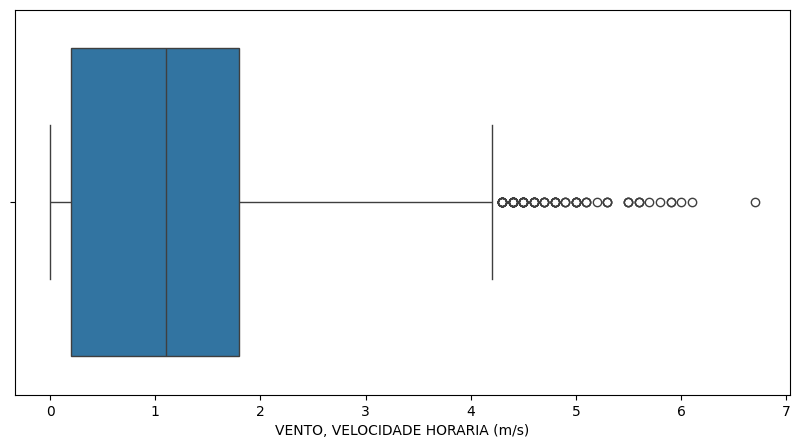

In [12]:
# Analisando a existencia de outleirs em 'VENTO, VELOCIDADE HORARIA (m/s)'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copia['VENTO, VELOCIDADE HORARIA (m/s)'])

In [13]:
df_copia.describe()

,DATA (YYYY-MM-DD),"VENTO, VELOCIDADE HORARIA (m/s)"
count,8760,8760.000000
mean,2009-07-01 23:59:59.999999744,1.168302
min,2009-01-01 00:00:00,0.000000
25%,2009-04-02 00:00:00,0.200000
50%,2009-07-02 00:00:00,1.100000
75%,2009-10-01 00:00:00,1.800000
max,2009-12-31 00:00:00,6.700000
std,NaN,1.053762


In [14]:
coluna = 'VENTO, VELOCIDADE HORARIA (m/s)'
bins = [0,1,2,3,4,5,6,7,8]

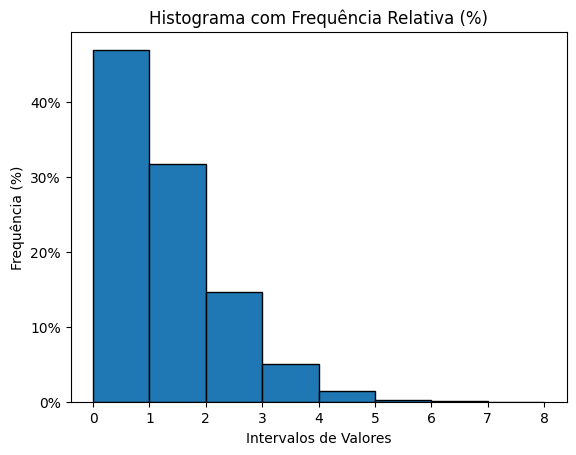

In [15]:
plt.hist(df_copia[coluna], bins=bins, edgecolor='black', weights=[1/len(df_copia)]*len(df_copia[coluna]))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Histograma com Frequência Relativa (%)')
plt.xlabel('Intervalos de Valores')
plt.ylabel('Frequência (%)')
plt.show()

In [16]:
from scipy.stats import weibull_min

In [17]:
valores_c = [1.5, 2.5]
valores_k = [2.5, 7.5, 8.5]

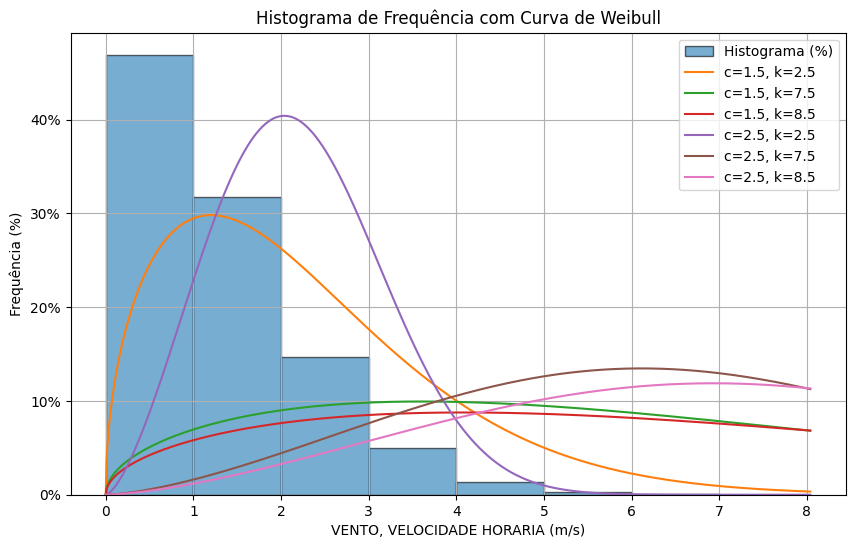

In [21]:
# Histograma com frequência relativa (percentual)
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_copia['VENTO, VELOCIDADE HORARIA (m/s)'], bins=[0,1,2,3,4,5,6,7,8], density=True, edgecolor='black', alpha=0.6, label='Histograma (%)')

# Ajustar para mostrar em porcentagem no eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


# Intervalo para as curvas
x = np.linspace(0, df_copia['VENTO, VELOCIDADE HORARIA (m/s)'].max()*1.2, 1000)

for c in valores_c:
    for k in valores_k:
        y = weibull_min.pdf(x, c, scale=k)
        plt.plot(x, y, label=f'c={c}, k={k}')


# Normalizar para coincidir com o histograma em % (ajuste automático)
y_percent = y / y.sum() * 100



plt.title('Histograma de Frequência com Curva de Weibull')
plt.xlabel('VENTO, VELOCIDADE HORARIA (m/s)')
plt.ylabel('Frequência (%)')
plt.legend()
plt.grid(True)
plt.show()

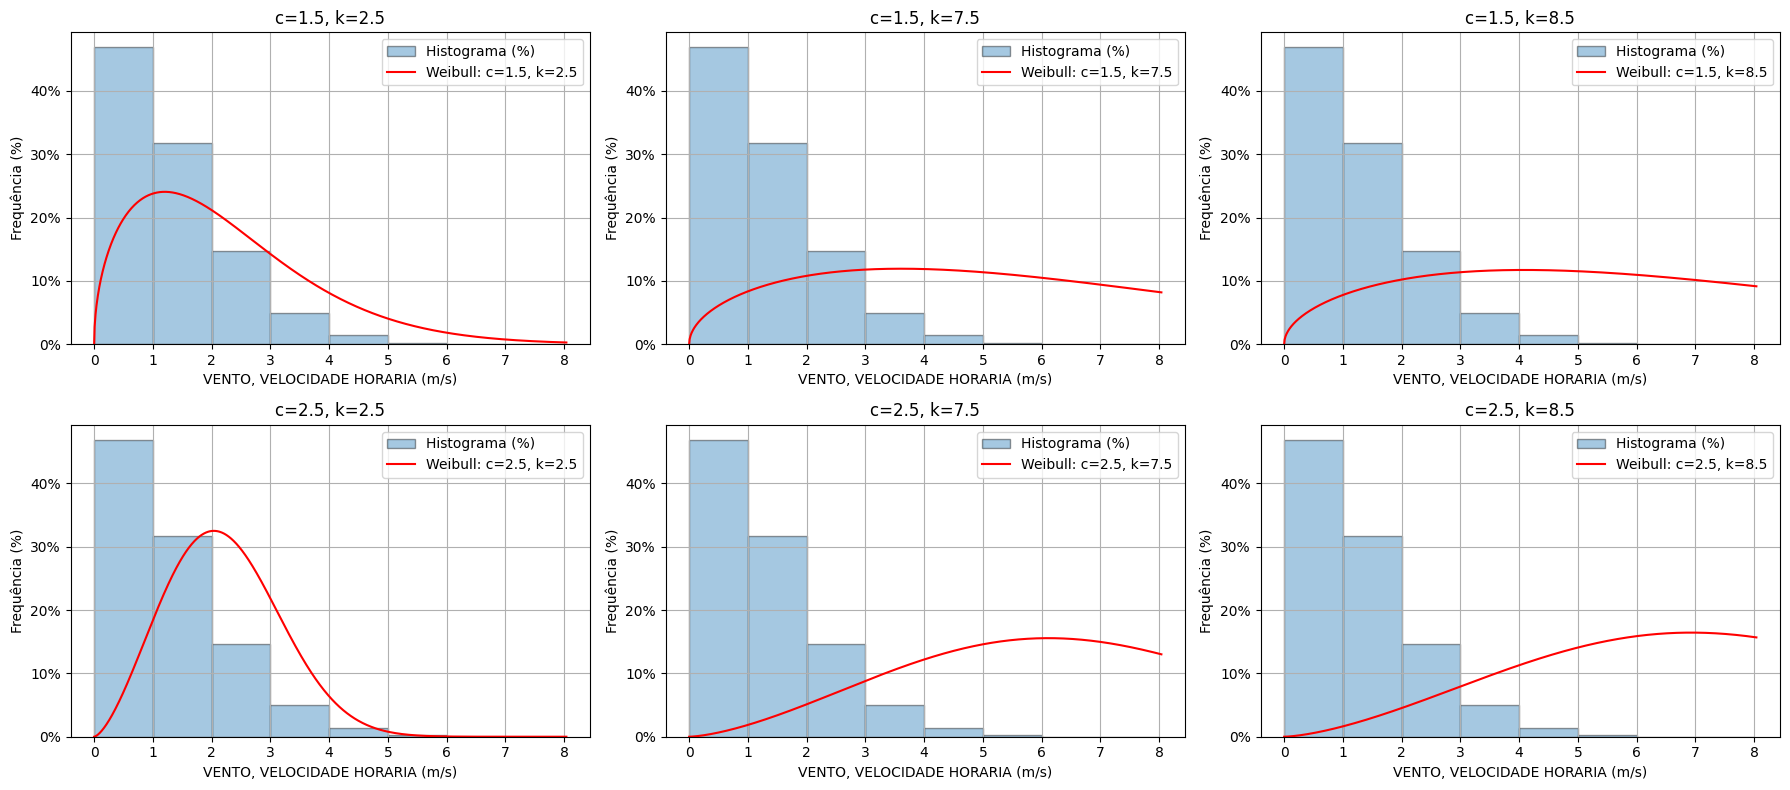

In [22]:
comb = [(c, k) for c in valores_c for k in valores_k]

fig, axs = plt.subplots(2, 3, figsize= (18, 8))
axs = axs.flatten()

counts, bins = np.histogram(df_copia['VENTO, VELOCIDADE HORARIA (m/s)'], bins=10, density=True)

for i, (c, k) in enumerate(comb):
    ax = axs[i]

    # Histograma de frequência relativa (percentual)
    ax.hist(df_copia['VENTO, VELOCIDADE HORARIA (m/s)'], bins=[0,1,2,3,4,5,6,7,8], density=True, edgecolor='black', alpha=0.4, label='Histograma (%)')

     # Curva de Weibull
    y = weibull_min.pdf(x, c, scale=k)
    y_percent = y / y.sum() * 100  # para escalar como porcentagem
    ax.plot(x, y_percent, 'r-', label=f'Weibull: c={c}, k={k}')

    # Formatação
    ax.set_title(f'c={c}, k={k}')
    ax.set_xlabel('VENTO, VELOCIDADE HORARIA (m/s)')
    ax.set_ylabel('Frequência (%)')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()